In [ ]:
#This is a compilation predictive modeling workshops done at Concordia

## Face Recognition
Using the faces dataset in:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
```

If you use the `faces.target` and `faces.target_names` attributes, you can build a facial recognition algorithm.

Use sklearn **gridsearch** (or an equivalent, like random search) to optimize the model for accuracy. Try both a SVM-based classifier and a logistic regression based classifier (with a feature pipeline of your choice) to get the best model. You should have at least 80% accuracy.

In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
y = faces.target
faces.target_names

n_components = 150

X_train, X_test, y_train, y_test = tts(X, y, random_state=0)
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})

In [2]:
clf = clf.fit(X_train_pca, y_train)

In [3]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_pca)
y_pred
print(classification_report(y_test, y_pred, target_names=faces.target_names))
#avg of 85% accuracy

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.69      0.79        16
     Colin Powell       0.87      0.87      0.87        61
  Donald Rumsfeld       0.86      0.69      0.76        35
    George W Bush       0.75      0.98      0.85       125
Gerhard Schroeder       0.79      0.66      0.72        29
      Hugo Chavez       1.00      0.53      0.69        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.96      0.74      0.84        35

         accuracy                           0.82       337
        macro avg       0.89      0.74      0.80       337
     weighted avg       0.84      0.82      0.82       337



# Predictive Modelling - Time Series

In [5]:
cd C:\Users\allis\Desktop\Data Science\Project Showcase\Predictive\data

C:\Users\allis\Desktop\Data Science\Project Showcase\Predictive\data


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from zipfile import ZipFile
df = pd.DataFrame({'name' : [], 'age' : [],'occur':[]})
zip_file = ZipFile('babies.zip')
a = zip_file.open('yob1884.txt')
df1 = pd.read_csv(a,names =['name','age','occur'])

In [7]:
for file in zip_file.namelist():
    if (file[-3:]) == 'txt':
        newfile = zip_file.open(file)
        tempdf = pd.read_csv(newfile,names =['name','age','occur','date'])
        tempdf['date'] = file[3:7]
        frames = [df,tempdf]
        df = pd.concat(frames)


In [8]:
df = df.sort_values(by=['date'])
df['date'] = pd.to_datetime(df['date'])


In [11]:
oliviadf = df.loc[(df.name =='Olivia')]
newtondf = df.loc[(df.name =='Newton')]
johndf = df.loc[(df.name =='John')]

odf = oliviadf.groupby('date').sum()
ndf = newtondf.groupby('date').sum()
jdf = johndf.groupby('date').sum()

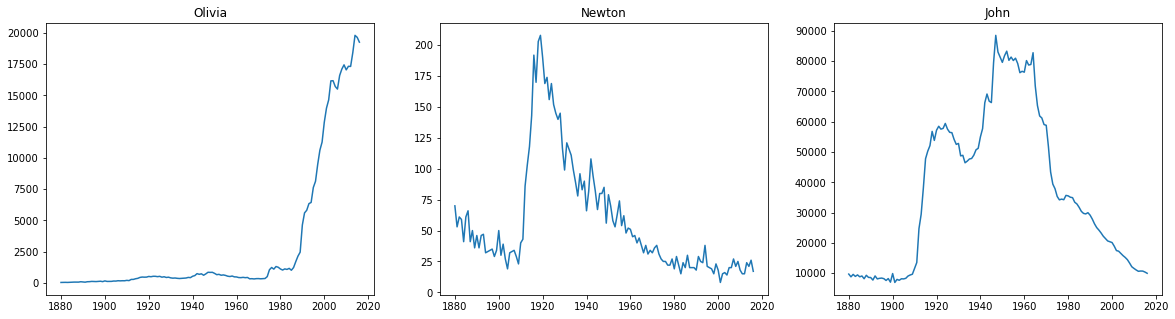

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].plot(odf)
axes[0].title.set_text('Olivia')

axes[1].plot(ndf)
axes[1].title.set_text('Newton')

axes[2].plot(jdf)
axes[2].title.set_text('John')

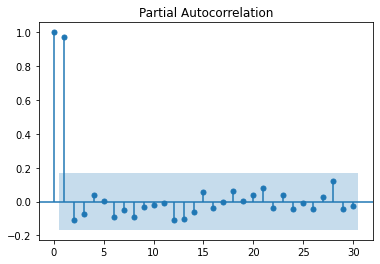

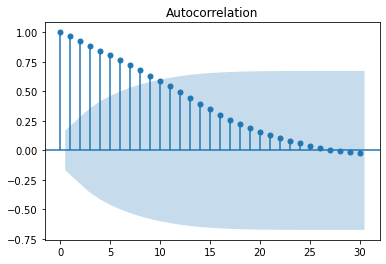

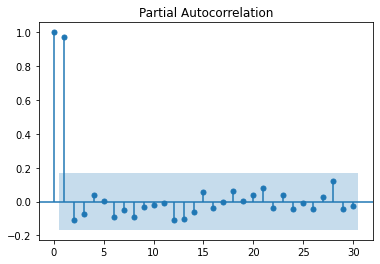

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#olivia
plot_acf(odf, lags=30)
plot_pacf(odf, lags=30)

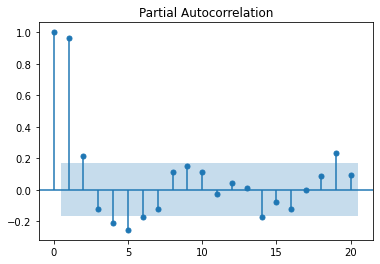

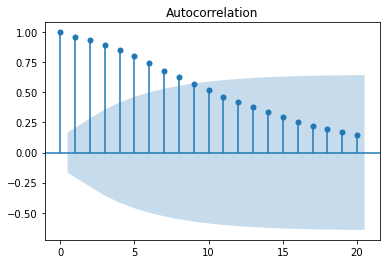

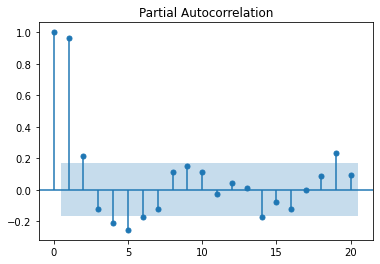

In [14]:
#Newton
plot_acf(ndf, lags=20)
plot_pacf(ndf, lags=20)

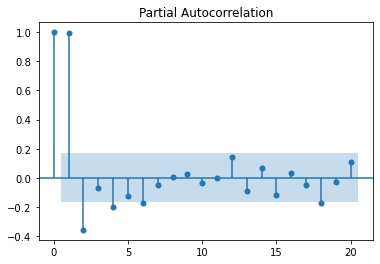

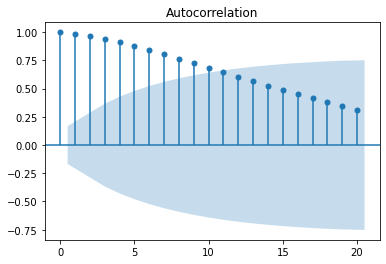

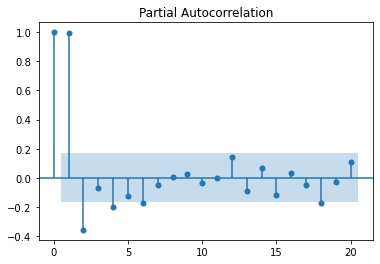

In [15]:
#john
plot_acf(jdf, lags=20)
plot_pacf(jdf, lags=20)

In [16]:
#splitting train data
odf_train = odf.iloc[68:]

ndf_train = ndf.iloc[60:]

jdf_train = jdf.iloc[80:]
odf_train

,occur
date,
1948-01-01,848.0
1949-01-01,854.0
1950-01-01,769.0
1951-01-01,666.0
1952-01-01,692.0
...,...
2012-01-01,17321.0
2013-01-01,18429.0
2014-01-01,19806.0


C:\Users\allis\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\allis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

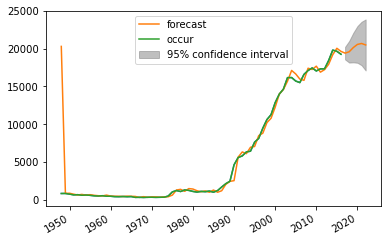

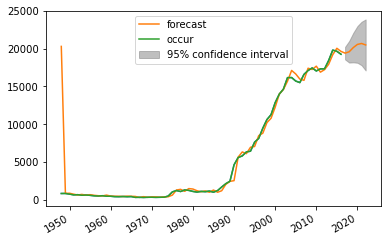

In [17]:
#olivia prediction
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(odf_train, order=(10, 0, 3))  
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(odf_train)

res.plot_predict('1948', '2022', ax=ax)